# dependencies

In [239]:
import tensorflow as tf
import os

In [240]:
import cv2
import imghdr
from matplotlib import pyplot as plt

#  Remove dodgy images

In [247]:
data_dir = 'data'


In [248]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [249]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [250]:
os.listdir(data_dir)

['happy', 'sad']

In [251]:
os.path.join(data_dir, image_class, image)

'data/.DS_Store/happy-girl-in-leaves.jpg'

In [262]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Load data

In [253]:
import numpy as np
from matplotlib import pyplot as plt

In [263]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [255]:
data_iterator = data.as_numpy_iterator()

In [256]:
batch = data_iterator.next()

In [257]:
batch[0].shape

(32, 256, 256, 3)

In [258]:
batch[1]

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

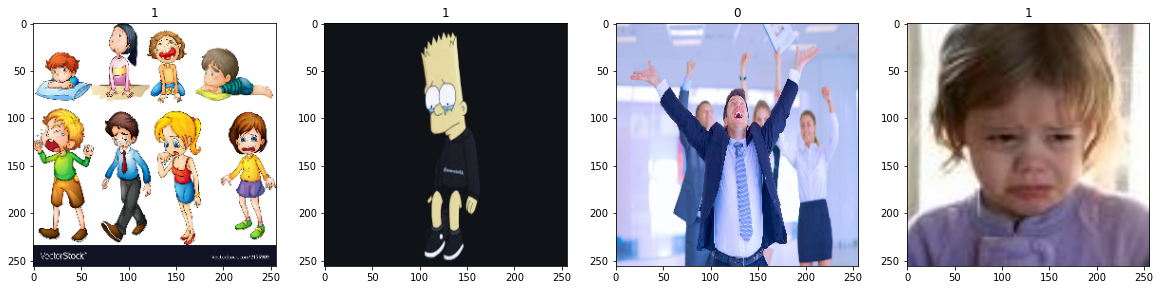

In [265]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# scale data

In [223]:
data = data.map(lambda x,y : (x/255, y))

In [224]:
scaled_iterator = data.as_numpy_iterator()

In [225]:
batch = scaled_iterator.next()

In [234]:
batch[0].max()

3.6371315e-15

In [235]:
len(data)

10

# Data split

In [276]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [277]:
train_size

7

In [278]:
val_size

2

In [279]:
test_size

1

In [280]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [281]:
len(test)

1

# Model building

# deep learning network

In [282]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [283]:
from tensorflow.keras.models import Sequential

In [284]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [285]:
model = Sequential()

In [286]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [287]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [288]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# Train

In [289]:
logdir = 'logs'

In [290]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

In [291]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 9s 918ms/step - loss: 198.9835 - accuracy: 0.4464 - val_loss: 14.3448 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 8s 898ms/step - loss: 6.3491 - accuracy: 0.5893 - val_loss: 2.2508 - val_accuracy: 0.5625
Epoch 3/20
7/7 [==============================] - 8s 898ms/step - loss: 0.9173 - accuracy: 0.7589 - val_loss: 0.3341 - val_accuracy: 0.8125
Epoch 4/20
7/7 [==============================] - 8s 900ms/step - loss: 0.3840 - accuracy: 0.8616 - val_loss: 0.2610 - val_accuracy: 0.9219
Epoch 5/20
7/7 [==============================] - 8s 903ms/step - loss: 0.2781 - accuracy: 0.8973 - val_loss: 0.1958 - val_accuracy: 0.9531
Epoch 6/20
7/7 [==============================] - 8s 894ms/step - loss: 0.1623 - accuracy: 0.9464 - val_loss: 0.0985 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 8s 906ms/step - loss: 0.0911 - accuracy: 0.9732 - val_loss: 0.0509 - val_accuracy: 0.9844
Epoch 8/20
7/7 [=

2022-09-04 10:55:31.355249: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 193 of 256
2022-09-04 10:55:31.355353: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 194 of 256
2022-09-04 10:55:31.355374: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 195 of 256
2022-09-04 10:55:31.355669: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 196 of 256
2022-09-04 10:55:31.869780: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


7/7 [==============================] - 56s 988ms/step - loss: 0.0065 - accuracy: 0.9955 - val_loss: 0.0097 - val_accuracy: 1.0000


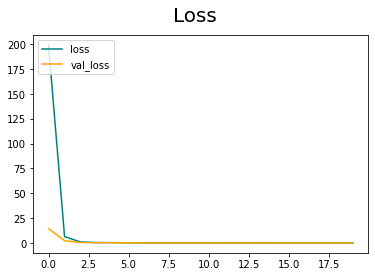

In [292]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

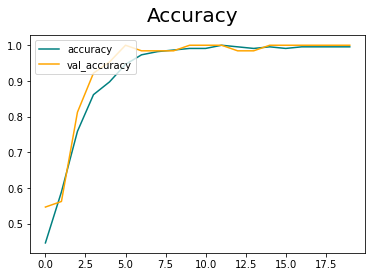

In [293]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate performance

In [294]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [296]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [297]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 604ms/step


In [298]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# Test


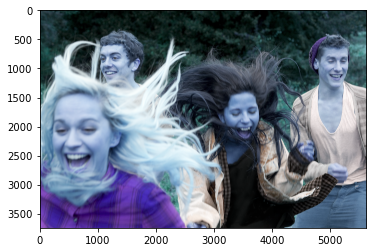

In [299]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

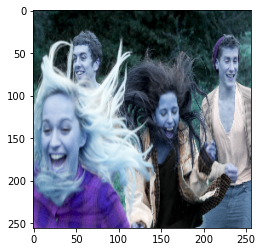

In [300]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [301]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 50ms/step


In [302]:
yhat

array([[0.48396152]], dtype=float32)

In [303]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


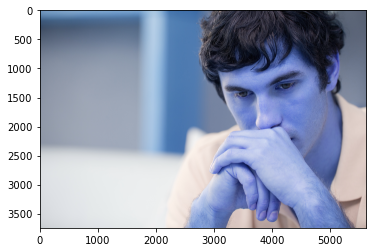

In [309]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img
          )
plt.show()

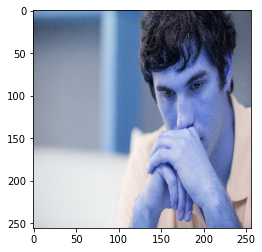

In [310]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [311]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 42ms/step


In [312]:
yhat

array([[0.50460196]], dtype=float32)

In [313]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# Save model

In [314]:
from tensorflow.keras.models import load_model 

In [317]:
model.save(os.path.join('models','model_classification_image_HappySad.h5'))

In [319]:
new_model = load_model(os.path.join('models', 'model_classification_image_HappySad.h5'))

In [320]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 87ms/step


array([[0.50460196]], dtype=float32)

In [321]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
